In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df2=pd.read_csv('NSE-TATAGLOBAL11.csv')
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df2['Date']=pd.to_datetime(df2.Date)
df2.index=df2['Date']

In [4]:
df=df2.sort_index(ascending=True, axis=0)

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2013-10-08 to 2018-10-08
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


<Axes: xlabel='Date'>

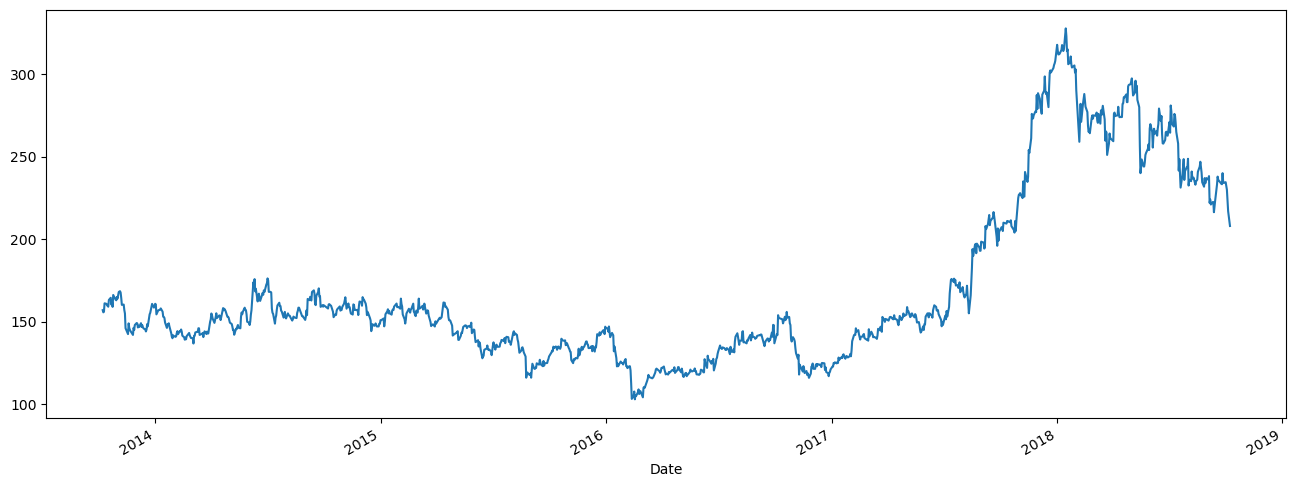

In [9]:
df['Open'].plot(figsize=(16,6))

In [10]:
X=df[['Open', 'High', 'Low', 'Last']]
y=df[['Close']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, random_state=0)

In [13]:
X_train.shape

(926, 4)

In [14]:
X_test.shape

(309, 4)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
model=LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([[-0.06374761,  0.0811134 ,  0.09670427,  0.88531773]])

In [17]:
model.intercept_

array([0.11469011])

In [17]:
predicted=model.predict(X_test)

In [19]:
X_test

,Open,High,Low,Last
Date,,,,
2018-02-26,273.55,274.80,271.55,274.80
2013-11-03,168.00,170.00,167.25,169.50
2018-03-21,265.30,266.30,262.15,262.90
2017-02-01,129.05,130.65,127.35,129.85
2014-07-04,168.10,171.20,166.00,168.10
...,...,...,...,...
2017-06-13,152.45,157.70,151.70,155.75
2017-01-06,125.40,126.95,124.05,124.50
2018-03-07,272.00,274.45,265.15,268.90


In [20]:
predicted.shape

(309, 1)

In [21]:
dframe=pd.DataFrame(y_test['Close'].values.flatten(), predicted.flatten())

In [18]:
dfr=pd.DataFrame({'Actual Price':y_test['Close'].values.flatten(), 'Predicted Preice':predicted.flatten()})
dfr

,Actual Price,Predicted Preice
0,273.50,274.511848
1,169.50,169.429512
2,263.20,262.904001
3,130.10,129.759322
4,167.85,168.160149
...,...,...
304,156.45,155.746223
305,124.65,124.636307
306,268.90,268.739985
307,138.15,138.491021


In [23]:
model.score(X_test, y_test)

0.9999355027626892

In [24]:
import math

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.30652210374493744
Mean Squared Error: 0.18960726405829068
Root Mean Squared Error: 0.43543916229284046
